<a href="https://colab.research.google.com/github/tijazz/ML_Model_EXplainability/blob/main/autism_prediction_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Platform Preparation and Data Loading Stage**

All the necessary modules and libraries are either installed or imported.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [2]:
!unzip -uq "/content/Autism_Prediction.zip" -d "/content/"
print("The file has been unzipped successfully")

The file has been unzipped successfully


In [3]:
import os
for dirname, _, filenames in os.walk('/content/Autism_Prediction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/Autism_Prediction/sample_submission.csv
/content/Autism_Prediction/train.csv
/content/Autism_Prediction/test.csv


We have printed the paths to our dataset and now lets load the data

In [4]:
data_train = pd.read_csv('/content/Autism_Prediction/train.csv')
data_test = pd.read_csv('/content/Autism_Prediction/test.csv')

# Data Description

Its important to know the nature of the data that we are dealing with , the below section deals with the nature of the dataset.

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

None of our columns has a missing value. So, we need not worry about null values and do not need to do any imputation

In [6]:
data_train.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


This gives us a numeric representation of the different statistical characteristics of the numeric data.

Below are the numeric columns segregated from the dataset.Most of these can also be treated as bivariate categorical values . We have a few categorical colums which can be converted to numeric columns. Lets do that first and later or we will study the characteristics of them as a whole.

In [7]:
data_train.iloc[:,[data_train[x].dtype != 'object' for x in  data_train]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         800 non-null    int64  
 1   A1_Score   800 non-null    int64  
 2   A2_Score   800 non-null    int64  
 3   A3_Score   800 non-null    int64  
 4   A4_Score   800 non-null    int64  
 5   A5_Score   800 non-null    int64  
 6   A6_Score   800 non-null    int64  
 7   A7_Score   800 non-null    int64  
 8   A8_Score   800 non-null    int64  
 9   A9_Score   800 non-null    int64  
 10  A10_Score  800 non-null    int64  
 11  age        800 non-null    float64
 12  result     800 non-null    float64
 13  Class/ASD  800 non-null    int64  
dtypes: float64(2), int64(12)
memory usage: 87.6 KB


In [8]:
num_cols = [data_train[x].dtype != 'object' for x in  data_train]

The below items represent the categorical columns.

In [9]:
data_train.iloc[:,[data_train[x].dtype == 'object' for x in  data_train]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           800 non-null    object
 1   ethnicity        800 non-null    object
 2   jaundice         800 non-null    object
 3   austim           800 non-null    object
 4   contry_of_res    800 non-null    object
 5   used_app_before  800 non-null    object
 6   age_desc         800 non-null    object
 7   relation         800 non-null    object
dtypes: object(8)
memory usage: 50.1+ KB


In [10]:
cat_cols = [data_train[x].dtype == 'object' for x in  data_train]

Lets understand the unique values in the categorical columns and also check if any column can be discarded

In [11]:
for item in data_train.iloc[:,cat_cols]:
    print(item)
    print(data_train[item].unique(),end = "\n")


gender
['f' 'm']
ethnicity
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
jaundice
['no' 'yes']
austim
['no' 'yes']
contry_of_res
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']
used_app_before
['no' 'yes']
age_desc
['18 and more']
relation
['Self' 'Relative' 'Parent' '?' 'Others' 'Health care professional']


The values gender,jaundice,austim and used_app_before can be conveted to numerical and age_desc can be discarded because it contains only a single value.

In [12]:
#Let us also check if all the categories of training data are consistent with test data or not , or else we will face issues in encoding as well as trainig and prediction

for item in data_train.iloc[:,cat_cols]:
    print(item)
    print([x for x in data_test[item].unique() if x not in data_train[item].unique()],end = "\n")


gender
[]
ethnicity
[]
jaundice
[]
austim
[]
contry_of_res
['Uruguay', 'Lebanon', 'Philippines']
used_app_before
[]
age_desc
[]
relation
[]


We can see that the countries of **Uruguay**, **Lebanon**, **Philippines** are present in the test set but not in the trainig set . This will cause problems so we have to deal with it in the pre-processing step. Rest all of the categorical variables are consistent.

# Exploratory Data Analysis

In this section we will perform exploratory data analysis and try to draw inferences from the different relationships that we observe.

Because some of the categorical variables can be converted to numeric , we will do so here for the purpose of observation. Later on in our preprocessing pipeline we will again deal with them.

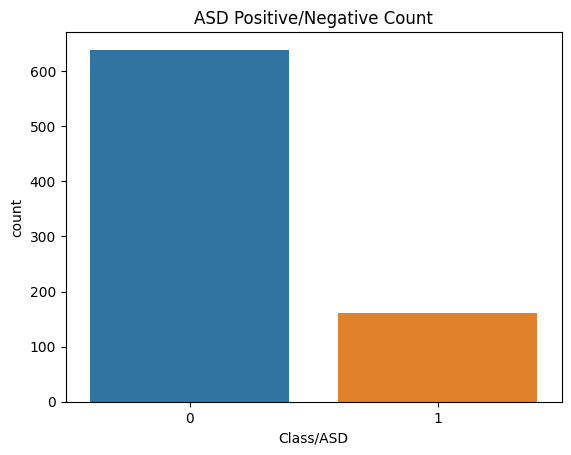

In [13]:
sns.countplot(data=data_train, x='Class/ASD').set_title('ASD Positive/Negative Count')

plt.show()

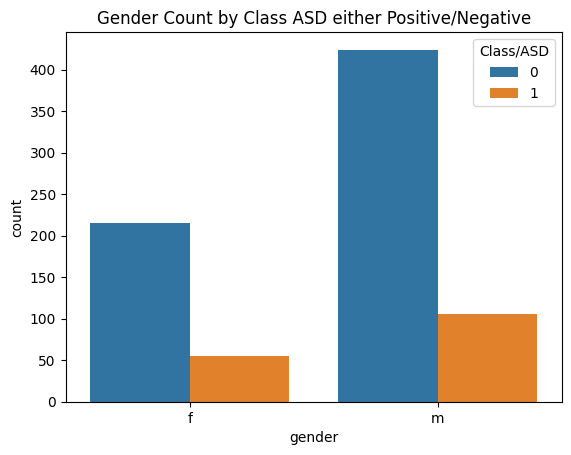

In [14]:
sns.countplot(data=data_train, x='gender', hue='Class/ASD').set_title('Gender Count by Class ASD either Positive/Negative')
plt.show()

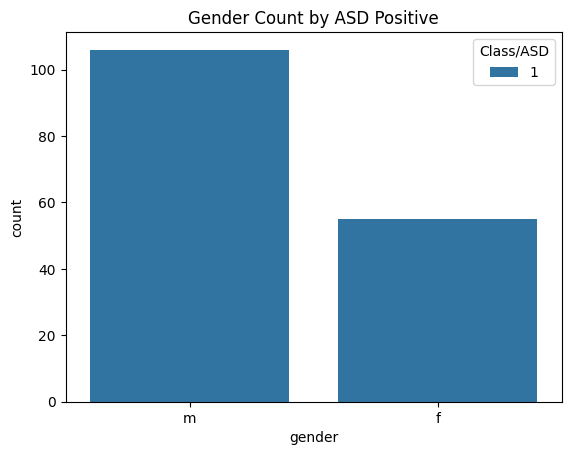

In [15]:
sns.countplot(data=data_train[data_train['Class/ASD']==1], x='gender', hue='Class/ASD').set_title('Gender Count by ASD Positive')

plt.show()

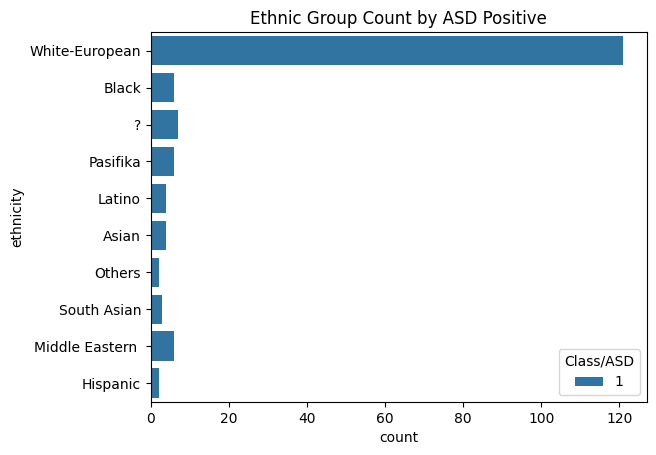

In [16]:
sns.countplot(data=data_train[data_train['Class/ASD']==1], y='ethnicity', hue='Class/ASD').set_title('Ethnic Group Count by ASD Positive')

plt.show()

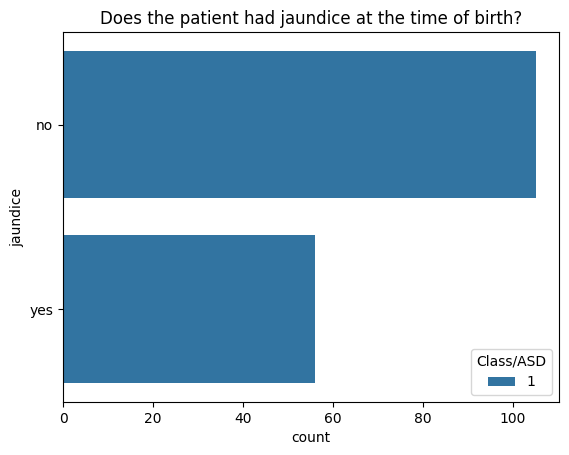

In [17]:
ax = sns.countplot(data=data_train[data_train['Class/ASD']==1], y='jaundice', hue='Class/ASD')
ax.set_title('Does the patient had jaundice at the time of birth?')

plt.show()

In [18]:
#Drop the column ID from the train dataset
num_df = data_train.iloc[:,num_cols].drop(['ID'],axis = 1)
cat_df = data_train.iloc[:,cat_cols]

In [19]:
# Replacing the text values with numerical values

import warnings
warnings.filterwarnings("ignore")

yes_no_map = {'yes' : 1,'no' : 0}
gender_map = {'m' : 1,'f':0}

cat_df['gender'] = cat_df['gender'].map(gender_map)
cat_df['jaundice'] = cat_df['jaundice'].map(yes_no_map)
cat_df['austim'] = cat_df['austim'].map(yes_no_map)
cat_df['used_app_before'] = cat_df['used_app_before'].map(yes_no_map)

for item in cat_df:
    if(cat_df.loc[:,item].dtype != 'object'):
        num_df.loc[:,item] = cat_df[item]

<Axes: xlabel='age', ylabel='result'>

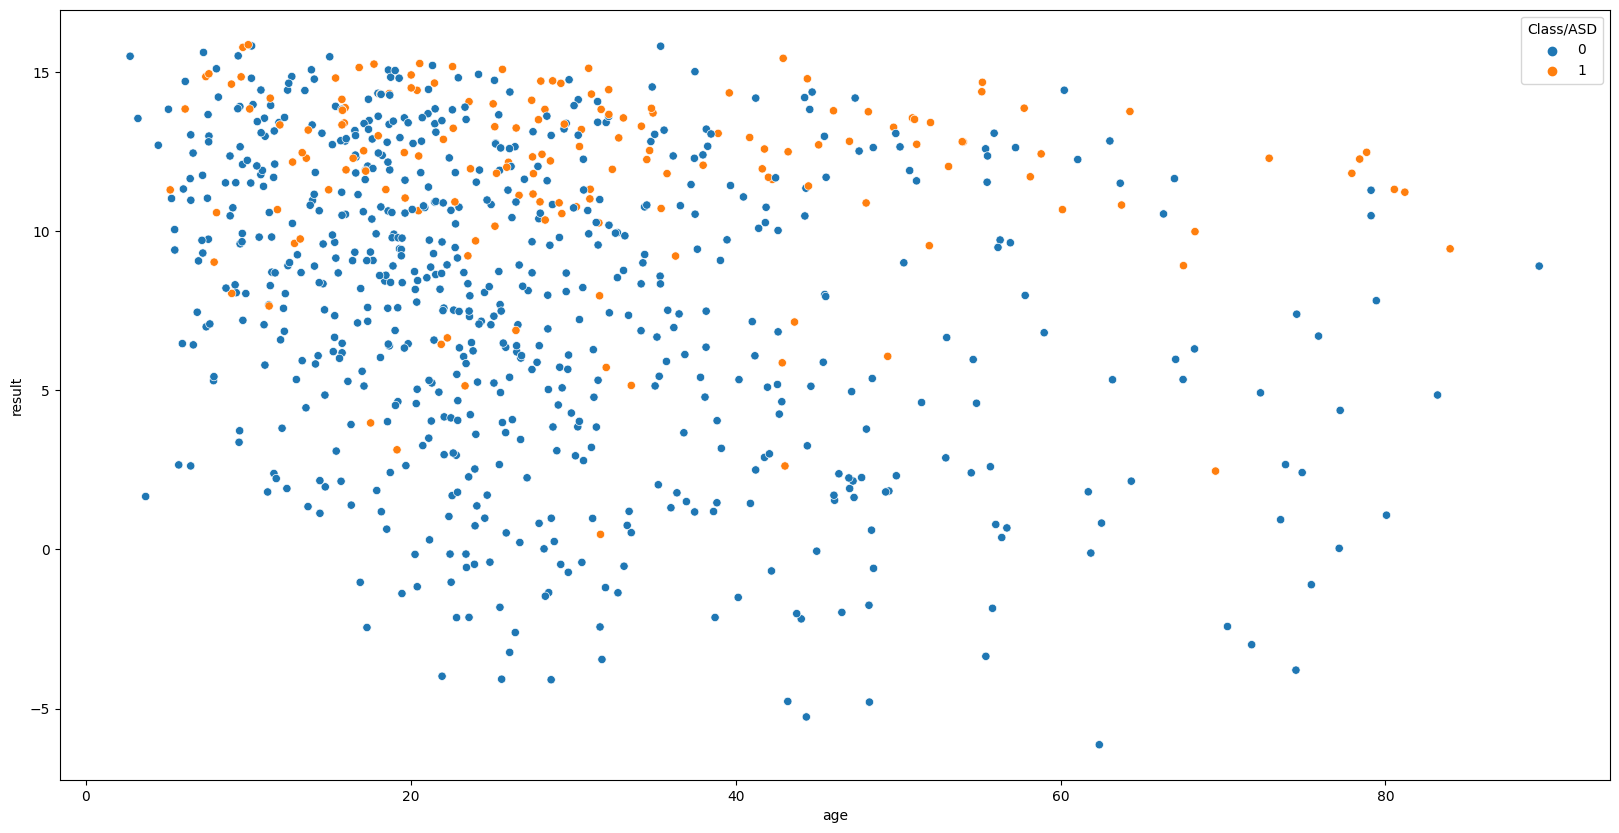

In [20]:
fig,ax = plt.subplots(figsize = (20,10))
sns.scatterplot(ax =ax ,data = num_df,x = 'age',y='result',hue = 'Class/ASD')

As we can see most of the points lie in the top left indicating higher test score and lower age have greater tendency towards autism

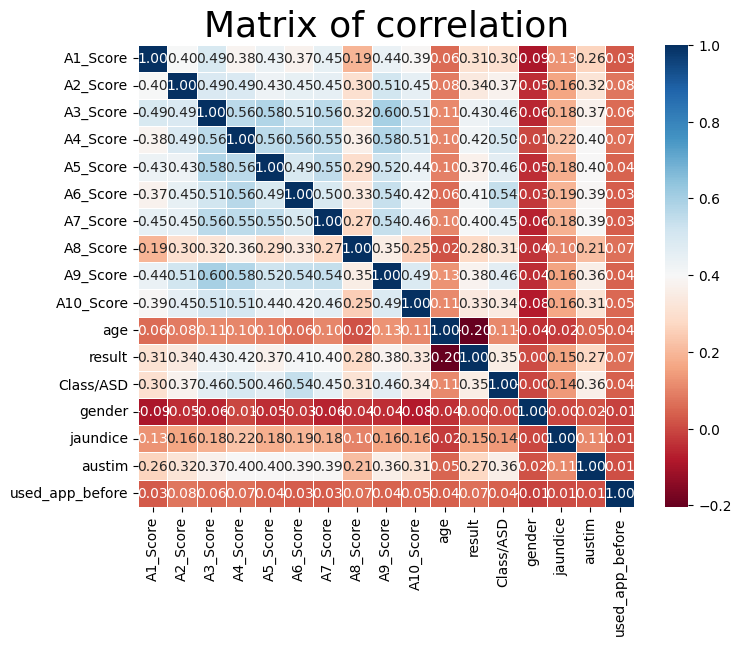

In [21]:
#Ploting the correlation matrix for variables

corr = num_df.corr ()
plt.figure ( figsize= (8,6) )
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=0.7, cbar = True, cmap='RdBu' )
plt.title ( 'Matrix of correlation', size = 26)
plt.show ()

Lets do the same for the remaining categorical variables

<Axes: xlabel='Count', ylabel='contry_of_res'>

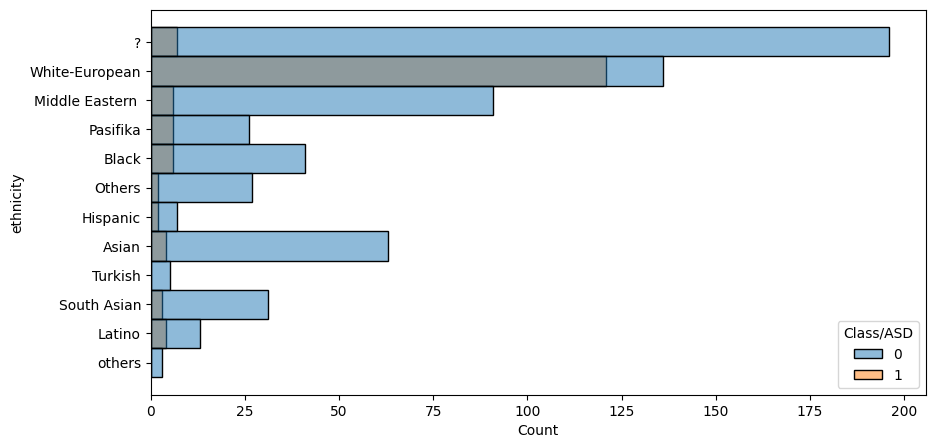

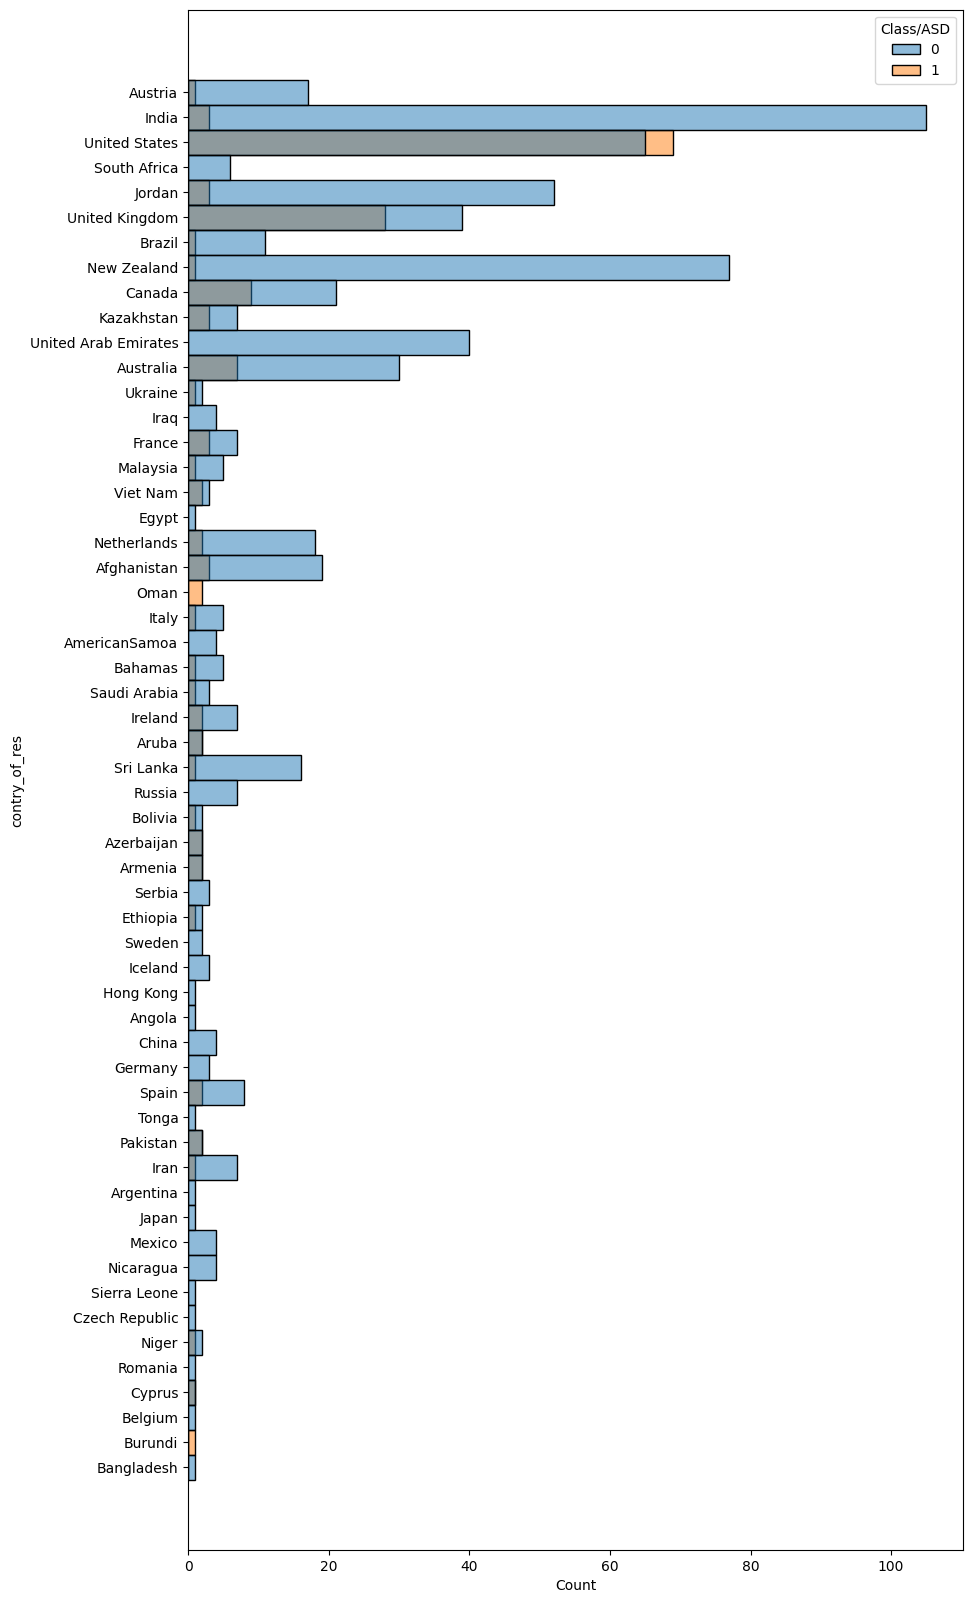

In [22]:
for item in cat_df:
    if(cat_df[item].dtype != 'object'):
        cat_df.drop(item,axis=1,inplace=True)

cat_df['Class/ASD'] = num_df['Class/ASD']

fig,ax = plt.subplots(figsize = (10,5))

sns.histplot(data =cat_df, y='ethnicity',ax=ax,hue = 'Class/ASD')

fig,ax = plt.subplots(figsize = (10,20))

sns.histplot(data =cat_df, y='contry_of_res',ax=ax,hue = 'Class/ASD')

The above two graphs indicate more suceptibility towards american and european nations. This is an important inference as we will use this train the model

# Preprocessing

In this step we will perform preprocessing of the data. This is one of the most important steps as this determines the performance of our models.

We will discard unused columns , convert categorical values to numeric labels and finally will normalise the data so that it becomes easy for the model to converge.

For label encoding we will sort the categorical values as per their occurance vs frequency and then asign them labels 1 to n . This will give the impression to the model that the labels have a priority , which is exactly what we want the model to think as this is eveident from the graphs.

In [23]:
#Applying Label encoding for the country of residence column

country_label = (data_train[data_train['Class/ASD'] == 1]['contry_of_res'].value_counts() / data_train[data_train['Class/ASD'] == 0]['contry_of_res'].value_counts() * data_train['contry_of_res'].value_counts()).sort_values(ascending=False)
country_label = country_label.map(lambda x : 0 if np.isnan(x) else x)
country_label = dict((country_label - min(country_label))/(max(country_label) - min(country_label)))

for item in ['Uruguay', 'Lebanon', 'Philippines']:
    country_label[item] = 0

country_label

{'United States': 1.0,
 'United Kingdom': 0.33816425120772947,
 'Canada': 0.09038657643459719,
 'Australia': 0.060692912250342484,
 'France': 0.030128858811532398,
 'Kazakhstan': 0.030128858811532398,
 'Aruba': 0.028120268224096908,
 'Azerbaijan': 0.028120268224096908,
 'Pakistan': 0.028120268224096908,
 'Armenia': 0.028120268224096908,
 'Afghanistan': 0.024420232931452575,
 'Viet Nam': 0.023433556853414087,
 'Jordan': 0.0223069435431538,
 'India': 0.021692778344303325,
 'Ireland': 0.01807731528691944,
 'Spain': 0.017575167640060566,
 'Netherlands': 0.015622371235609393,
 'Cyprus': 0.014060134112048454,
 'Ukraine': 0.01054510058403634,
 'Bolivia': 0.01054510058403634,
 'Niger': 0.01054510058403634,
 'Ethiopia': 0.01054510058403634,
 'Saudi Arabia': 0.009373422741365635,
 'Malaysia': 0.008436080467229073,
 'Italy': 0.008436080467229073,
 'Bahamas': 0.008436080467229073,
 'Iran': 0.008034362349741973,
 'Brazil': 0.007669164061117338,
 'Sri Lanka': 0.007469446247025741,
 'Austria': 0.0074

In [24]:
#Applying Label encoding for the ethnicity column

eth_label = data_train.loc[:,['ethnicity','Class/ASD']]
mapper = {
    '?' : 'others',
    'Others' : 'others'
}
eth_label['ethnicity'] = eth_label['ethnicity'].map(lambda x : mapper[x] if x in mapper else x)
eth_label = (eth_label[eth_label['Class/ASD'] == 1]['ethnicity'].value_counts() / eth_label[eth_label['Class/ASD'] == 0]['ethnicity'].value_counts() * eth_label['ethnicity'].value_counts()).sort_values(ascending=False)
eth_label = eth_label.map(lambda x : 0 if np.isnan(x) else x)
eth_label = dict((eth_label - min(eth_label))/(max(eth_label) - min(eth_label)))
eth_label

{'White-European': 1.0,
 'others': 0.040928171940439864,
 'Pasifika': 0.0322959672093029,
 'Black': 0.030080542629396453,
 'Middle Eastern ': 0.027970614458056983,
 'Latino': 0.022876310106589557,
 'Asian': 0.018604356772025682,
 'South Asian': 0.01438993700253214,
 'Hispanic': 0.011245917153239403,
 'Turkish': 0.0}

In [25]:
#Custom function to preprocess the trained dataframe which contains all the Categorical columns replaced with their respective numerical values

def preprocess(data : pd.DataFrame):
    data_temp = data.copy()
    data_temp = data_temp.drop(['age_desc','relation'],axis = 1)
    data_temp['gender'] = data_temp['gender'].map(lambda x : 1 if x == 'm' else 0)
    data_temp['used_app_before'] = data_temp['used_app_before'].map(lambda x : 1 if x == 'yes' else 0)
    data_temp['jaundice'] = data_temp['jaundice'].map(lambda x : 1 if x == 'yes' else 0)
    data_temp['austim'] = data_temp['austim'].map(lambda x : 1 if x == 'yes' else 0)
    data_temp['ethnicity'] = data_temp['ethnicity'].map(lambda x : 'others' if (x == 'Others' or x == '?') else x)
    data_temp['ethnicity'] = data_temp['ethnicity'].map(eth_label)
    data_temp['age'] = (data_temp['age'] - min(data_temp['age']))/(max(data_temp['age']) - min(data_temp['age']))
    data_temp['result'] = (data_temp['result'] - min(data_temp['result']))/(max(data_temp['result']) - min(data_temp['result']))
    data_temp['contry_of_res'] = data_temp['contry_of_res'].map(country_label)
    data_temp = data_temp.drop(['ID'],axis = 1)
    return data_temp

In [26]:
data_train_preprocess = preprocess(data_train)

In [27]:
data_train_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    int64  
 12  ethnicity        800 non-null    float64
 13  jaundice         800 non-null    int64  
 14  austim           800 non-null    int64  
 15  contry_of_res    800 non-null    float64
 16  used_app_before  800 non-null    int64  
 17  result          

In [28]:
data_train_preprocess.head(10)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,0.408726,0,0.040928,0,0,0.007444,0,0.567913,0
1,0,0,0,0,0,0,0,0,0,0,0.519141,1,0.040928,0,0,0.021693,0,0.381655,0
2,1,1,1,1,1,1,1,1,1,1,0.053743,1,1.000000,0,1,1.000000,0,0.954452,1
3,0,0,0,0,0,0,0,0,0,0,0.240288,0,0.040928,0,0,1.000000,0,0.382630,0
4,0,0,0,0,0,0,0,0,0,0,0.466748,1,0.040928,0,0,0.000000,0,0.061865,0
5,1,0,0,0,0,1,0,0,1,1,0.332123,1,0.027971,0,0,0.022307,0,0.713926,0
6,1,0,0,0,0,0,1,1,1,0,0.296386,0,0.032296,0,0,0.338164,0,0.642190,0
7,1,1,1,1,1,1,1,0,1,1,0.273981,1,0.030081,0,1,1.000000,0,0.881077,1
8,1,1,1,1,0,0,0,1,1,1,0.524363,1,1.000000,0,0,0.007669,0,0.199263,0
9,0,0,0,0,0,0,0,1,0,1,0.247275,0,0.040928,1,0,0.007121,0,0.957684,0


Now that we have preprocessed our data , it is time to train and evaluate and select the best model.

In [29]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(data_train_preprocess.drop('Class/ASD',axis=1),data_train_preprocess['Class/ASD'])


# Model Training

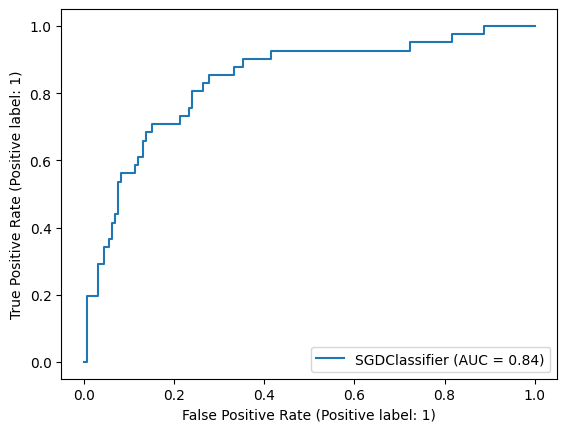

In [30]:
# Stochastic Gradient Descent (SGD) Classifier Model implementation

from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay


model_SGD = SGDClassifier(learning_rate='adaptive',eta0 = 0.0001,loss= 'hinge',penalty = 'elasticnet',max_iter = 50, random_state= 0 )
model_SGD.fit(x_train,y_train)
pred = model_SGD.predict(x_test)
RocCurveDisplay.from_estimator(model_SGD,x_test,y_test)


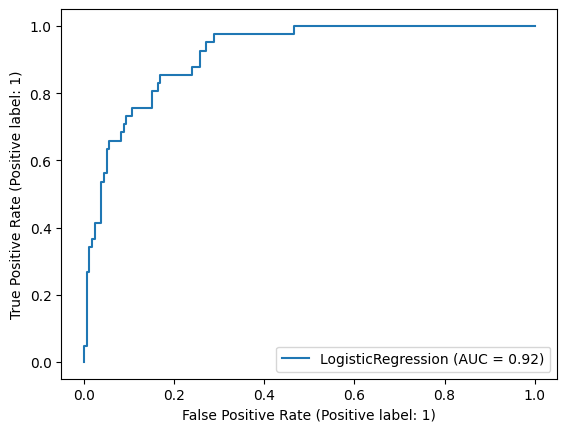

In [31]:
# Logistic Regression Model implementation

from sklearn.linear_model import LogisticRegression
model_Log = LogisticRegression(random_state= 0)
model_Log.fit(x_train,y_train)
pred = model_Log.predict(x_test)
RocCurveDisplay.from_estimator(model_Log,x_test,y_test)

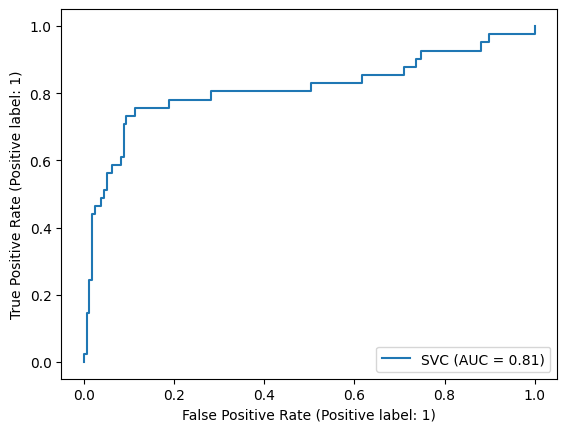

In [32]:
# Support Vector Machine Model implementation

from sklearn.svm import SVC
model_SVC = SVC(random_state= 0)
model_SVC.fit(x_train,y_train)
pred = model_SVC.predict(x_test)
RocCurveDisplay.from_estimator(model_SVC,x_test,y_test)

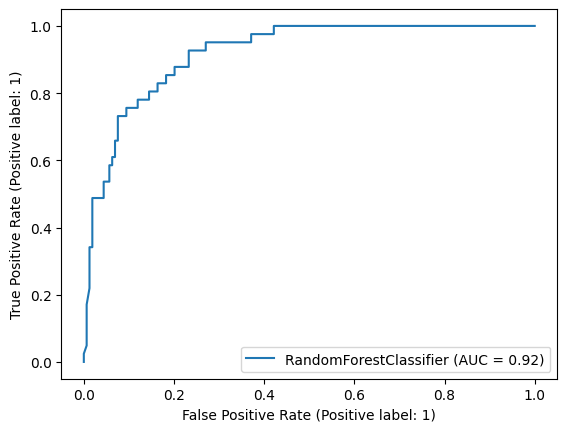

In [33]:
# Random Forest Classifier Model implementation

from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(max_depth=2, random_state=0)
model_RF.fit(x_train,y_train)
pred = model_RF.predict(x_test)
RocCurveDisplay.from_estimator(model_RF,x_test,y_test)


##Model Explainability -  Shapley Additive Explanation (SHAP)

In [35]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 3.2 MB/s eta 0:00:00


In [42]:
import shap
import matplotlib.pyplot as plt

# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer = shap.TreeExplainer(model_RF)

shap_values = explainer.shap_values(x_test)

Variable Importance Plot - Global Interpretation for Random Forest Model


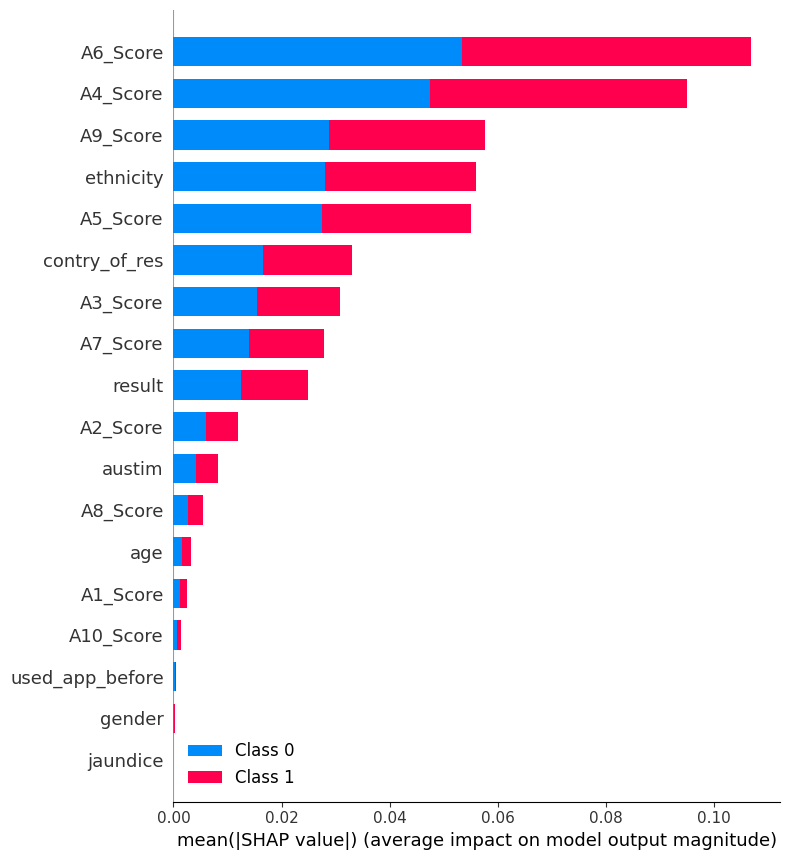

In [44]:
print("Variable Importance Plot - Global Interpretation for Random Forest Model")
figure = plt.figure()
shap.summary_plot(shap_values, x_test)

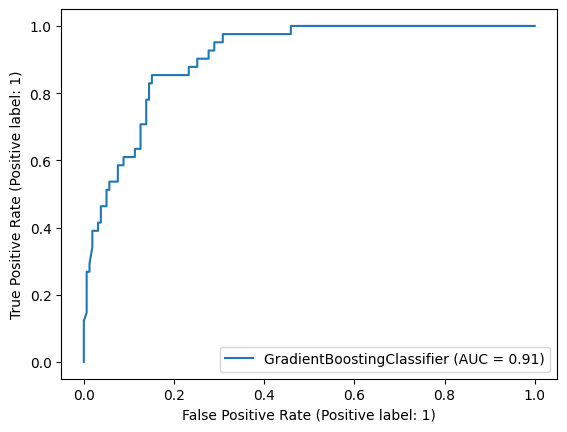

In [34]:
# Gradient Boosting Classifier Model implementation

from sklearn.ensemble import GradientBoostingClassifier
model_GB = GradientBoostingClassifier(n_estimators=50, learning_rate=1, max_depth=1, random_state= 0 )
model_GB.fit(x_train,y_train)
pred = model_GB.predict(x_test)
RocCurveDisplay.from_estimator(model_GB,x_test,y_test)

In [45]:
# load JS visualization code to notebook
shap.initjs()

# Create the explainer
explainer_GB = shap.TreeExplainer(model_GB)

shap_values_GB = explainer_GB.shap_values(x_test)

Variable Importance Plot - Global Interpretation for Gradient Boosting Model


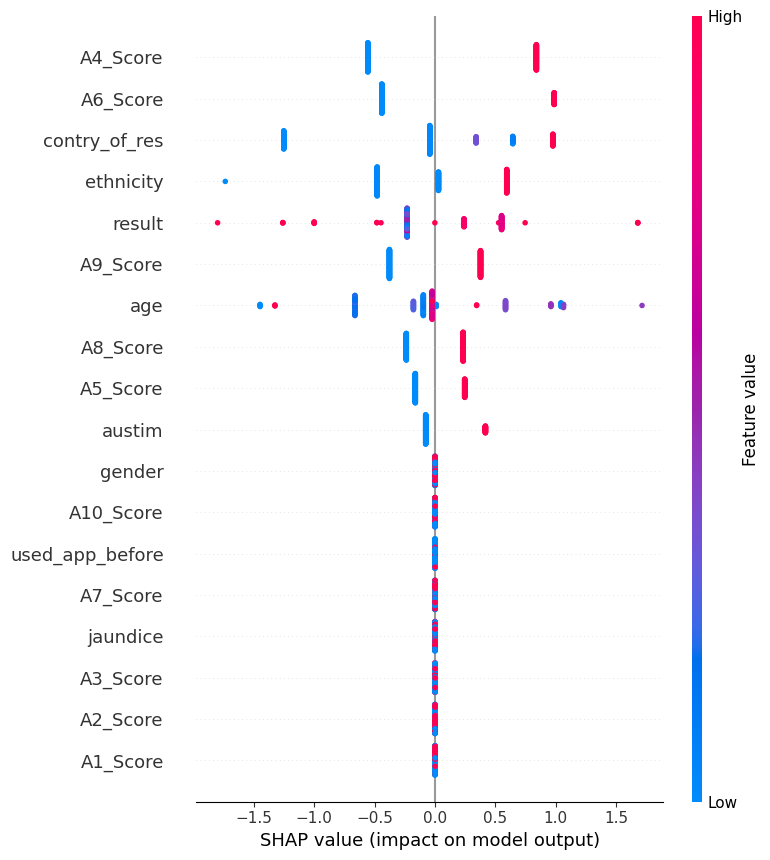

In [47]:
print("Variable Importance Plot - Global Interpretation for Gradient Boosting Model")
figure = plt.figure()
shap.summary_plot(shap_values_GB, x_test)